____
__Universidad Tecnologica Nacional Buenos Aires__<br/>
__Ingenieria Industrial__<br/>
__Ciencia de Datos - Curso I5521 - Turno Sabado Mañana__<br/>
__Docente: Martin Palazzo__<br/>
__source: https://github.com/clusterai/clusterai_2021/__<br/>
__Tema: Regresion con redes neuronales__
____

In [116]:
# importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# libs de sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# libs de tensorflow-keras
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [118]:
# observamos la version de tensorflow instalada
print(tf.__version__)

2.7.0


## **Carga y EDA dataset**
el dataset utilizado ya esta pre-cargado en sklearn: boston house prices dataset

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

In [119]:
# obtenemos el dataset precargado de sklearn "boston" con precios de casas
boston = load_boston()


# define the independient variables
x = boston.data
# define the dependen variables (labels)
y = boston.target


# visualization of the first 20 values of y
y[:20]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2])

In [122]:
#x

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


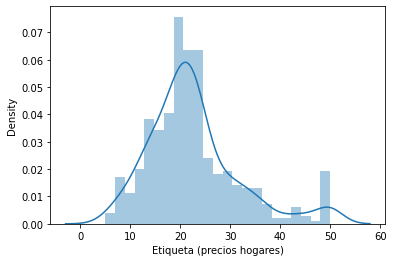

In [123]:

# distplot of label distribution
sns.distplot(y)
plt.xlabel('Etiqueta (precios hogares)')
plt.show()

In [124]:
# check the dimensionality and samples of the dataset
np.shape(x)

(506, 13)

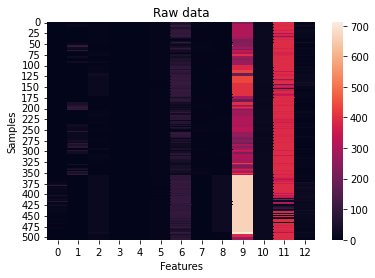

In [125]:
# print the x matrix
sns.heatmap(x)
plt.title('Raw data')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

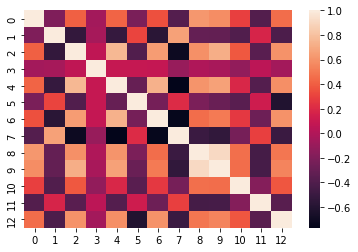

In [126]:
# Feature pairwise linear correlation
sns.heatmap(pd.DataFrame(x).corr())
plt.show()


## **Preprocesamiento de datos**

In [127]:
# train test split
xtr0, xte0, ytr, yte = train_test_split(x,y,test_size=0.3, random_state = 10)

In [128]:
scaler = StandardScaler()

In [129]:
# get the mean and standard deviation of every feature
scaler.fit(xtr0)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [130]:
# scale each feature using the mean and std-dev in the previous step
xtr = scaler.transform(xtr0)
xte = scaler.transform(xte0)

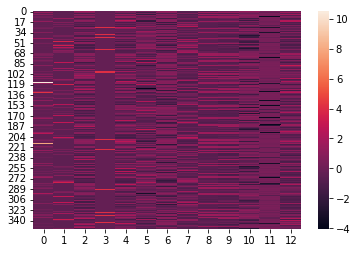

In [131]:
# print the x matrix
sns.heatmap(xtr)

## **Regresion con ridge regression**

In [132]:
# definimos modelo
ridge_reg = Ridge(alpha=1.0)
# entrenamos modelo
ridge_reg.fit(xtr, ytr)
# realizamos prediccion con el modelo entrenado en datos nuevos
yte_hat_ridge = ridge_reg.predict(xte)

## **Regresion con linear regression**

In [133]:
# definimos modelo
lin_reg = LinearRegression()
# entrenamos modelo
lin_reg.fit(xtr, ytr)
# realizamos prediccion con el modelo entrenado en datos nuevos
yte_hat_lin = lin_reg.predict(xte)

## **Regresion con redes neuronales**

In [134]:
# definimos los hiperparametros de entrenamiento de la NN
l2_reg = 0.01
lrate = 0.001
epochs = 50
bachs = 8

### **Definimos la arquitectura del modelo**

In [140]:
################### Optimizer ###################
optim = tf.keras.optimizers.Adam(learning_rate= lrate)

################### MODEL ARCHITECTURE ###############

# 00) INPUT
inputdim = Input(shape=(xtr.shape[1]), name = 'input')

# 01) DENSE LAYER
hl_1 = Dense(5, kernel_regularizer=regularizers.l2(l2_reg), activation = 'relu', name = 'HL1' )(inputdim)

# 02) DENSE LAYER
hl_2 = Dense(2, activation = 'linear', name = 'HL2')(hl_1)

# 03) Regression Layer
reg_layer = Dense(1, name = 'reg_layer')(hl_2)

# 04) MODEL
nn_regressor = Model(inputdim, reg_layer)
nn_regressor.summary()
nn_regressor.compile(optimizer= optim, loss='mse')

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 13)]              0         
                                                                 
 HL1 (Dense)                 (None, 5)                 70        
                                                                 
 HL2 (Dense)                 (None, 2)                 12        
                                                                 
 reg_layer (Dense)           (None, 1)                 3         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


### **Visualizamos el modelo resultante**

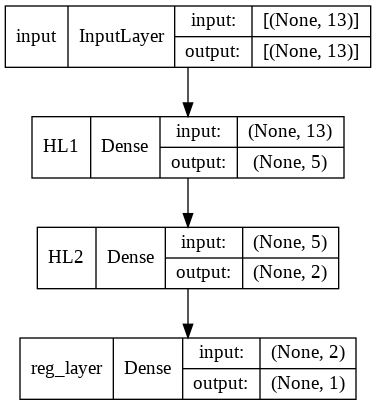

In [142]:
tf.keras.utils.plot_model(nn_regressor, show_shapes = True)

#### **Entrenamos la red neuronal**

In [143]:
nn_regressor.fit(xtr, ytr,epochs=epochs, batch_size=bachs,  shuffle=True,  validation_data=(xte, yte))

Epoch 1/50
45/45 [==============================] - 1s 5ms/step - loss: 625.3030 - val_loss: 722.4316
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 601.9163 - val_loss: 700.5259
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 584.4922 - val_loss: 684.4110
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 571.0239 - val_loss: 671.1994
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 559.5922 - val_loss: 659.8413
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 549.3174 - val_loss: 648.5028
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 538.4045 - val_loss: 635.4928
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 523.9530 - val_loss: 615.9264
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 502.8777 - val_loss: 587.8857
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 473.0596 

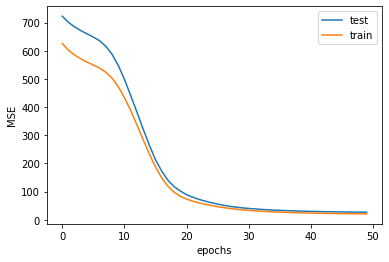

In [145]:
# imprimimos la historia del error
plt.plot(nn_regressor.history.history['val_loss'], label = 'test')
plt.plot(nn_regressor.history.history['loss'], label = 'train')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.show()

In [146]:
# realizamos la prediccion con la NN
yte_hat_nn = nn_regressor.predict(xte)

## **Comparamos el rendimiento de los tres modelos**

In [147]:
# medimos el MSE de la prediccion de cada modelo
mse_lin = mean_squared_error(yte_hat_lin, yte)
mse_ridge = mean_squared_error(yte_hat_ridge, yte)
mse_nn = mean_squared_error(yte_hat_nn, yte)

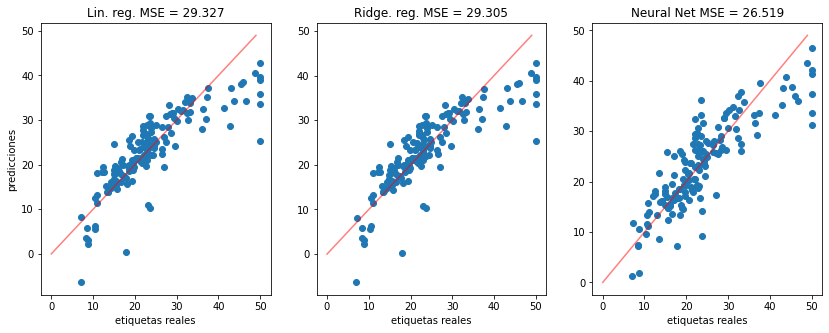

In [149]:
# ploteamos las predicciones de cada modelo 
fig, ax = plt.subplots(1,3, figsize = (14,5))
ax[0].scatter(yte, yte_hat_lin)
ax[0].plot(np.arange(np.max(yte)),np.arange(np.max(yte)), color = 'r', alpha = 0.5)
ax[0].set_title('Lin. reg. MSE = '+str(np.round(mse_lin,3)))
ax[0].set_xlabel('etiquetas reales')
ax[0].set_ylabel('predicciones')
ax[1].scatter(yte, yte_hat_ridge)
ax[1].plot(np.arange(np.max(yte)),np.arange(np.max(yte)), color = 'r', alpha = 0.5)
ax[1].set_title('Ridge. reg. MSE = '+str(np.round(mse_ridge,3)))
ax[1].set_xlabel('etiquetas reales')
ax[2].scatter(yte, yte_hat_nn)
ax[2].plot(np.arange(np.max(yte)),np.arange(np.max(yte)), color = 'r', alpha = 0.5)
ax[2].set_title('Neural Net MSE = '+str(np.round(mse_nn,3)))
ax[2].set_xlabel('etiquetas reales')
plt.show()